In [236]:
#Importing libraries

import pandas as pd


In [245]:
raw_data_1=pd.read_csv('/content/drive/MyDrive/train.csv')
raw_data_2=pd.read_csv('/content/drive/MyDrive/test.csv')

In [246]:
raw_data_1.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Observation:
Columns to be removed:
1. ID

Label Encoding/ One hot encoding needed columns:
1. Gender
2. Driving license
3. PReviously_Insured
4. Age group
5. Region code
6. Vehicle Age
7. Vehicle Damage
7. Policy_Sales_channel




In [247]:
data=pd.concat([raw_data_1,raw_data_2],axis=0)

In [249]:
data.reset_index(drop=True,inplace=True)

In [250]:
raw_data_1.shape,raw_data_2.shape,data.shape

((381109, 12), (127037, 11), (508146, 12))

In [251]:
data.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
508141,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
508142,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
508143,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
508144,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN
508145,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,NaN


In [252]:
data.reset_index(drop=True)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
508142,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
508143,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
508144,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN


In [253]:
# Removing id column:
data.drop('id',axis=1,inplace=True)

In [254]:
data.isnull().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [255]:
data[data['Age'].isnull()==True]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [256]:
data.dropna(how='all',inplace=True)

In [257]:
data.dropna(axis=0,subset=['Policy_Sales_Channel','Vintage'],inplace=True)

In [258]:
data.isnull().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [259]:
data['Gender']=data.Gender.replace({'Male':0,'Female':1})

In [260]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [261]:
data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,0.460145,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.122563
std,0.498410,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,0.000000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [262]:
import matplotlib.pyplot as plt
%matplotlib inline

{'boxes': [<matplotlib.lines.Line2D at 0x7f290df7f850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f290dce2bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f290def8090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f290def80d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f290dcf4350>,
  <matplotlib.lines.Line2D at 0x7f290dcf4a90>]}

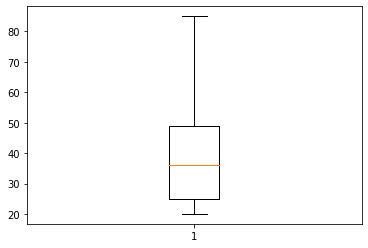

In [263]:
plt.boxplot(data['Age'])

In [264]:
data.Age.value_counts()

24    34565
23    32353
22    28058
25    27578
21    21910
      ...  
81       77
82       42
83       32
84       18
85       12
Name: Age, Length: 66, dtype: int64

In [265]:
data['Age']=data['Age'].apply(lambda x: '20-32' if x in range(20,31) else '31-45' if x in range(31,46) else '46-60' if x in range(46,61) else 'Gt_60 ' )


In [266]:
data['Age'].value_counts()

20-32     215338
31-45     128013
46-60     107248
Gt_60      57547
Name: Age, dtype: int64

In [267]:
data['Vehicle_Age'].value_counts()

1-2 Year     267015
< 1 Year     219805
> 2 Years     21326
Name: Vehicle_Age, dtype: int64

In [268]:
data['Vehicle_Damage']=data['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [269]:
data['Vehicle_Damage'].value_counts()

1    256248
0    251898
Name: Vehicle_Damage, dtype: int64

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 508145
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508146 non-null  int64  
 1   Age                   508146 non-null  object 
 2   Driving_License       508146 non-null  int64  
 3   Region_Code           508146 non-null  float64
 4   Previously_Insured    508146 non-null  int64  
 5   Vehicle_Age           508146 non-null  object 
 6   Vehicle_Damage        508146 non-null  int64  
 7   Annual_Premium        508146 non-null  float64
 8   Policy_Sales_Channel  508146 non-null  float64
 9   Vintage               508146 non-null  int64  
 10  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 46.5+ MB


In [271]:
cat=pd.get_dummies(data,columns=['Age','Region_Code','Vehicle_Age','Policy_Sales_Channel'],drop_first=True)

In [272]:
cat.reset_index(drop=True,inplace=True)

In [273]:
cat.tail()

,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Age_31-45,Age_46-60,Age_Gt_60,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
508141,1,1,1,0,30867.0,56,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,0
508142,1,1,0,1,28700.0,165,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
508143,0,1,1,0,29802.0,74,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,0
508144,0,1,1,0,62875.0,265,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0
508145,0,1,1,0,27927.0,231,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Columns: 220 entries, Gender to Policy_Sales_Channel_163.0
dtypes: float64(2), int64(5), uint8(213)
memory usage: 130.4 MB


In [275]:
cat['Gender'].isnull().sum()

0

In [276]:
train=cat[cat['Response'].notnull()]
pred=train['Response']
train.drop('Response',inplace=True,axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [277]:
train.shape,pred.shape

((381109, 219), (381109,))

In [278]:
train.isnull().sum()

Gender                        0
Driving_License               0
Previously_Insured            0
Vehicle_Damage                0
Annual_Premium                0
                             ..
Policy_Sales_Channel_157.0    0
Policy_Sales_Channel_158.0    0
Policy_Sales_Channel_159.0    0
Policy_Sales_Channel_160.0    0
Policy_Sales_Channel_163.0    0
Length: 219, dtype: int64

In [279]:
test=cat[cat['Response'].isnull()]

In [280]:
train.shape,test.shape

((381109, 219), (127037, 220))

In [281]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train,pred,random_state=121)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((285831, 219), (285831,), (95278, 219), (95278,))

In [283]:
#Using PCA to reduce dimensions

from sklearn.decomposition import PCA
pca = PCA(n_components=219)
#principalComponents = pca.fit_transform(xtrain)
#principalDf = pd.DataFrame(data = principalComponents)

X_train = pca.fit_transform(xtrain)
X_test = pca.transform(xtest)


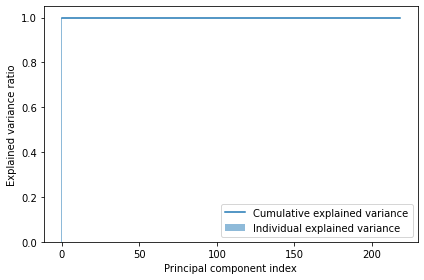

In [284]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [285]:
xtrain.shape,ytrain.shape

((285831, 219), (285831,))

In [286]:
pred.value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64

In [287]:
# Using SelectKBest to find top 10 features:

from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2,f_classif
#Select top 10 features based on mutual info regression
selector = SelectKBest(mutual_info_classif, k =10)
selector.fit(xtrain, ytrain)
xtrain.columns[selector.get_support()]



KeyboardInterrupt: ignored

In [232]:
from sklearn.pipeline import make_pipeline
#Setting up a pipeline
pipe=make_pipeline(SelectKBest(f_classif))

from sklearn.model_selection import GridSearchCV
#setting up the grid search
paras=list(range(1,194))
params={'selectkbest__k':paras}

params
gs=GridSearchCV(pipe,params,scoring='accuracy',n_jobs=-1,cv=5)
#fitting gs to training data
gs.fit(xtrain, ytrain)

KeyboardInterrupt: ignored

In [198]:
gs.best_params_

{'selectkbest__k': 1}

In [288]:
test.drop('Response',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [289]:
#Using Random forest classifier

from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(xtrain, ytrain)

testing=clf.predict(xtrain)
# performing predictions on the test dataset
y_pred = clf.predict(xtest)

rf_result=clf.predict(test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()



# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL with trained data: ", metrics.accuracy_score(ytrain, testing))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(ytest, y_pred))

rf_output=pd.concat([pd.DataFrame(raw_data_2.id),pd.DataFrame(rf_result)],axis=1)

rf_output.to_csv("rf_result.csv",index=False)


ACCURACY OF THE MODEL with trained data:  0.9983346802831043
ACCURACY OF THE MODEL:  0.8556015029702555


In [290]:
# Using logistic regression:

from sklearn.linear_model import LogisticRegression

digreg = LogisticRegression()
digreg.fit(xtrain, ytrain)

testing = digreg.predict(xtrain)
y_pred = digreg.predict(xtest)

print("Accuracy of Logistic Regression model with trained data is:", metrics.accuracy_score(ytrain, testing)*100)
print("Accuracy of Logistic Regression model is:", metrics.accuracy_score(ytest, y_pred)*100)

lg_result=digreg.predict(test)
#pd.DataFrame(lg_result).to_csv("LG_Results.csv",index=False)

lg_output=pd.concat([pd.DataFrame(raw_data_2.id),pd.DataFrame(lg_result)],axis=1)

lg_output.to_csv("LG_result.csv",index=False)

Accuracy of Logistic Regression model with trained data is: 87.74030808414763
Accuracy of Logistic Regression model is: 87.7537311866328


# Model execution with less number of variables
(Accuracy :56%)

In [295]:
cat=pd.get_dummies(data,columns=['Age','Region_Code',],drop_first=True)

In [296]:
cat['Vehicle_Age']=cat['Vehicle_Age'].apply(lambda x: 1 if x=='<1 Year' else 2 if x=='1-2 Year' else 3 if x=='>2 Years' else 0)

In [297]:
cat.reset_index(drop=True,inplace=True)

In [298]:
cat.tail()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_31-45,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
508141,1,1,1,0,0,30867.0,152.0,56,NaN,0,...,0,0,0,0,0,0,0,0,0,0
508142,1,1,0,2,1,28700.0,122.0,165,NaN,1,...,0,0,0,0,0,0,0,0,0,0
508143,0,1,1,0,0,29802.0,152.0,74,NaN,0,...,0,0,0,1,0,0,0,0,0,0
508144,0,1,1,2,0,62875.0,26.0,265,NaN,0,...,0,0,0,0,0,0,0,0,0,0
508145,0,1,1,2,0,27927.0,124.0,231,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [299]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 64 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508146 non-null  int64  
 1   Driving_License       508146 non-null  int64  
 2   Previously_Insured    508146 non-null  int64  
 3   Vehicle_Age           508146 non-null  int64  
 4   Vehicle_Damage        508146 non-null  int64  
 5   Annual_Premium        508146 non-null  float64
 6   Policy_Sales_Channel  508146 non-null  float64
 7   Vintage               508146 non-null  int64  
 8   Response              381109 non-null  float64
 9   Age_31-45             508146 non-null  uint8  
 10  Age_46-60             508146 non-null  uint8  
 11  Age_Gt_60             508146 non-null  uint8  
 12  Region_Code_1.0       508146 non-null  uint8  
 13  Region_Code_2.0       508146 non-null  uint8  
 14  Region_Code_3.0       508146 non-null  uint8  
 15  

In [300]:
cat['Gender'].isnull().sum()

0

In [301]:
train=cat[cat['Response'].notnull()]
pred=train['Response']
train.drop('Response',inplace=True,axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [302]:
train.shape,pred.shape

((381109, 63), (381109,))

In [303]:
train.isnull().sum()

Gender                0
Driving_License       0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
                     ..
Region_Code_48.0      0
Region_Code_49.0      0
Region_Code_50.0      0
Region_Code_51.0      0
Region_Code_52.0      0
Length: 63, dtype: int64

In [304]:
test=cat[cat['Response'].isnull()]

In [305]:
train.shape,test.shape

((381109, 63), (127037, 64))

In [306]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train,pred,random_state=121)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((285831, 63), (285831,), (95278, 63), (95278,))

In [308]:
#Using PCA to reduce dimensions

from sklearn.decomposition import PCA
pca = PCA(n_components=63)
#principalComponents = pca.fit_transform(xtrain)
#principalDf = pd.DataFrame(data = principalComponents)

X_train = pca.fit_transform(xtrain)
X_test = pca.transform(xtest)


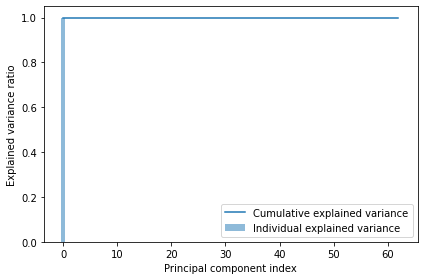

In [309]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [310]:
xtrain.shape,ytrain.shape

((285831, 63), (285831,))

In [311]:
pred.value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64

In [312]:
# Using SelectKBest to find top 10 features:

from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2,f_classif
#Select top 10 features based on mutual info regression
selector = SelectKBest(mutual_info_classif, k =10)
selector.fit(xtrain, ytrain)
xtrain.columns[selector.get_support()]



Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Age_31-45',
       'Age_46-60', 'Region_Code_28.0'],
      dtype='object')

In [314]:
from sklearn.pipeline import make_pipeline
#Setting up a pipeline
pipe=make_pipeline(SelectKBest(f_classif))

from sklearn.model_selection import GridSearchCV
#setting up the grid search
paras=list(range(1,63))
params={'selectkbest__k':paras}

params
gs=GridSearchCV(pipe,params,scoring='accuracy',n_jobs=-1,cv=5)
#fitting gs to training data
gs.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=5, estimator=Pipeline(steps=[('selectkbest', SelectKBest())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]},
             scoring='accuracy')

In [315]:
gs.best_params_

{'selectkbest__k': 1}

In [316]:
test.drop('Response',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [319]:
#Using Random forest classifier

from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(xtrain, ytrain)

testing=clf.predict(xtrain)
# performing predictions on the test dataset
y_pred = clf.predict(xtest)

rf_result=clf.predict(test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()



# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL with trained data: ", metrics.accuracy_score(ytrain, testing))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(ytest, y_pred))

rf_output=pd.concat([pd.DataFrame(raw_data_2.id),pd.DataFrame(rf_result,columns=['Response'])],axis=1)

rf_output.to_csv("rf_result.csv",index=False)


ACCURACY OF THE MODEL with trained data:  0.9983206859997691
ACCURACY OF THE MODEL:  0.8570813829005647


In [320]:
# Using logistic regression:

from sklearn.linear_model import LogisticRegression

digreg = LogisticRegression()
digreg.fit(xtrain, ytrain)

testing = digreg.predict(xtrain)
y_pred = digreg.predict(xtest)

print("Accuracy of Logistic Regression model with trained data is:", metrics.accuracy_score(ytrain, testing)*100)
print("Accuracy of Logistic Regression model is:", metrics.accuracy_score(ytest, y_pred)*100)

lg_result=digreg.predict(test)
#pd.DataFrame(lg_result).to_csv("LG_Results.csv",index=False)

lg_output=pd.concat([pd.DataFrame(raw_data_2.id),pd.DataFrame(lg_result,columns=['Response'])],axis=1)

lg_output.to_csv("LG_result.csv",index=False)

Accuracy of Logistic Regression model with trained data is: 86.3440284643723
Accuracy of Logistic Regression model is: 86.29799114171163


Using only 10 features

In [321]:
cols=['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Age_31-45',
       'Age_46-60', 'Region_Code_28.0']

In [325]:
xtrain1=xtrain[cols]
xtest1=xtest[cols]
test1=test[cols]

In [326]:
xtrain1.shape,xtest1.shape,test1.shape

((285831, 10), (95278, 10), (127037, 10))

In [327]:
#Using Random forest classifier

from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(xtrain1, ytrain)

testing=clf.predict(xtrain1)
# performing predictions on the test dataset
y_pred = clf.predict(xtest1)

rf_result=clf.predict(test1)

# metrics are used to find accuracy or error
from sklearn import metrics
print()



# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL with trained data: ", metrics.accuracy_score(ytrain, testing))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(ytest, y_pred))

rf_output=pd.concat([pd.DataFrame(raw_data_2.id),pd.DataFrame(rf_result,columns=['Response'])],axis=1)

rf_output.to_csv("rf_result.csv",index=False)


ACCURACY OF THE MODEL with trained data:  0.9721058947419979
ACCURACY OF THE MODEL:  0.8401729675266063


In [328]:
# Using logistic regression:

from sklearn.linear_model import LogisticRegression

digreg = LogisticRegression()
digreg.fit(xtrain1, ytrain)

testing = digreg.predict(xtrain1)
y_pred = digreg.predict(xtest1)

print("Accuracy of Logistic Regression model with trained data is:", metrics.accuracy_score(ytrain, testing)*100)
print("Accuracy of Logistic Regression model is:", metrics.accuracy_score(ytest, y_pred)*100)

lg_result=digreg.predict(test1)
#pd.DataFrame(lg_result).to_csv("LG_Results.csv",index=False)

lg_output=pd.concat([pd.DataFrame(raw_data_2.id),pd.DataFrame(lg_result,columns=['Response'])],axis=1)

lg_output.to_csv("LG_result.csv",index=False)

Accuracy of Logistic Regression model with trained data is: 87.74030808414763
Accuracy of Logistic Regression model is: 87.7537311866328


In [330]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain1, ytrain)
 
# making predictions on the testing set
y_pred = gnb.predict(xtest1)

nb_result=gnb.predict(test1)
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(ytest, y_pred)*100)


nb_output=pd.concat([pd.DataFrame(raw_data_2.id),pd.DataFrame(nb_result,columns=['Response'])],axis=1)

nb_output.to_csv("NB_result.csv",index=False)

Gaussian Naive Bayes model accuracy(in %): 83.12831923424085


In [334]:
from sklearn import svm
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(xtrain1, ytrain)
predicted= support.predict(xtest1)

svm_result=support.predict(test1)


score=metrics.accuracy_score(ytest,predicted)
print("Your Model Accuracy is", score)
#train.to_csv( "svm_pred.csv")

svm_output=pd.concat([pd.DataFrame(raw_data_2.id),pd.DataFrame(svm_result,columns=['Response'])],axis=1)

svm_output.to_csv("svn_result.csv",index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Your Model Accuracy is 0.877537311866328
